In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [4]:
twitter = pd.read_csv("twitter_training.csv")

In [5]:
twitter

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [6]:
twitter.head(5)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [9]:
col_names=['ID','Entity','Sentiments','Comment']
twitter=pd.read_csv('twitter_training.csv', names=col_names)

In [10]:
twitter.head()

,ID,Entity,Sentiments,Comment
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [15]:
twitter.shape

(74682, 4)

In [11]:
twitter.describe()

,ID
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [12]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          74682 non-null  int64 
 1   Entity      74682 non-null  object
 2   Sentiments  74682 non-null  object
 3   Comment     73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [13]:
twitter.isnull().sum()

ID              0
Entity          0
Sentiments      0
Comment       686
dtype: int64

In [16]:
twitter.dropna(axis = 0,inplace = True)

In [18]:
twitter.shape

(73996, 4)

In [20]:
print(twitter.duplicated().sum())

2340


In [21]:
twitter.drop_duplicates(inplace = True)


In [22]:
print(twitter.duplicated().sum())

0


In [51]:
twitter.shape

(71656, 4)

In [23]:
sentiment_count = twitter['Sentiments'].value_counts()
sentiment_count

Sentiments
Negative      21698
Positive      19713
Neutral       17708
Irrelevant    12537
Name: count, dtype: int64

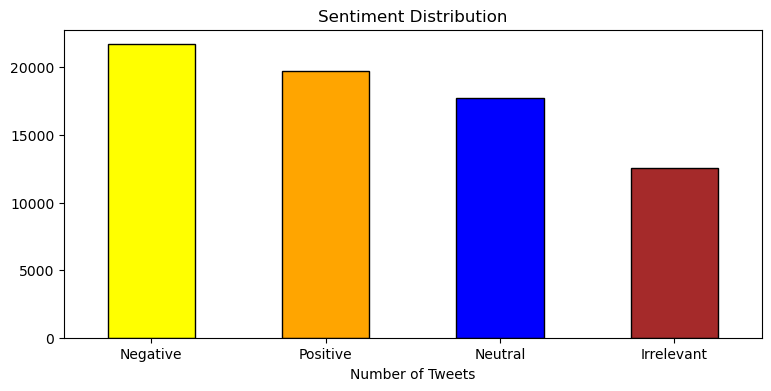

In [25]:
plt.figure(figsize=(9,4))
sentiment_count.plot(kind='bar',color=['yellow','orange','blue','brown'],edgecolor = 'black')
plt.title('Sentiment Distribution')
plt.xlabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

In [52]:
brand_sentiment_counts = twitter.groupby('Entity')['Sentiments'].value_counts().unstack(fill_value=0)
print(brand_sentiment_counts)

Sentiments                         Irrelevant  Negative  Neutral  Positive
Entity                                                                    
Amazon                                    185       565     1197       302
ApexLegends                               185       574      913       606
AssassinsCreed                            256       365      153      1382
Battlefield                               907       445      342       561
Borderlands                               238       415      581       972
CS-GO                                     620       335      523       717
CallOfDuty                                660       861      367       426
CallOfDutyBlackopsColdWar                 545       540      340       817
Cyberpunk2077                             457       360      456       902
Dota2                                     401       705      579       540
FIFA                                      538      1127      100       473
Facebook                 

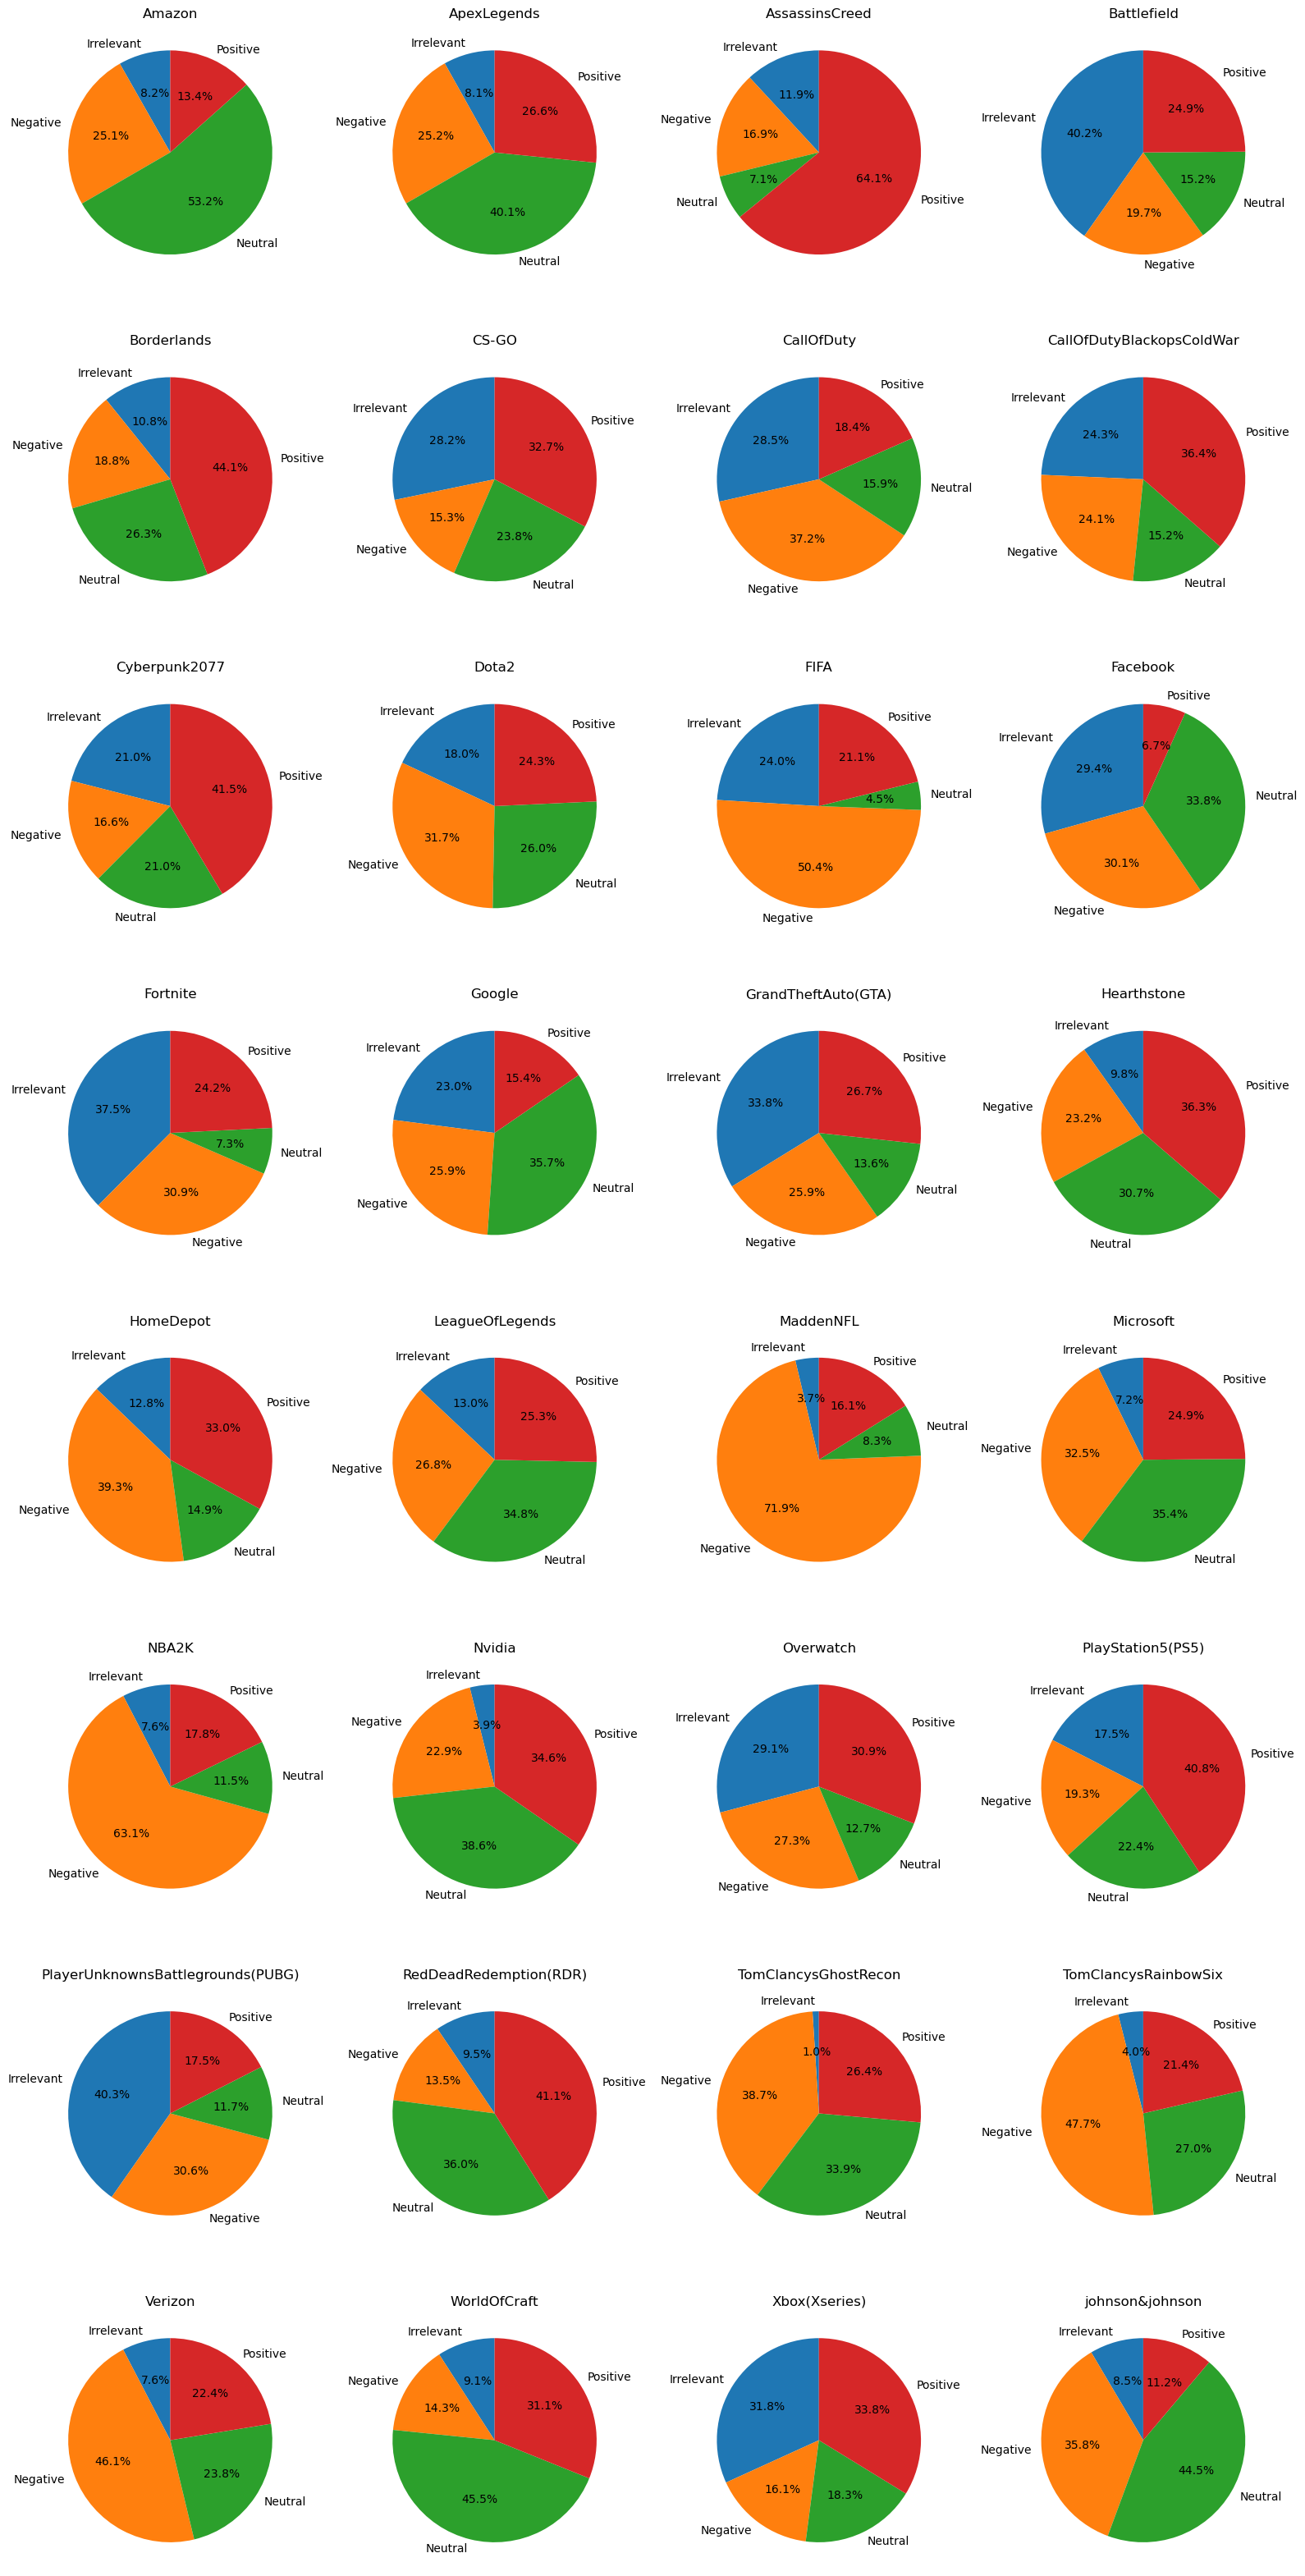

In [53]:
brands = list(brand_sentiment_counts.index)
number_of_brands = len(brands)
charts_per_row = 4
num_rows = math.ceil(num_brands / charts_per_row)

fig, axes = plt.subplots(num_rows, charts_per_row, figsize=(charts_per_row * 4, num_rows * 4))

axes = axes.flatten()

for idx, brand in enumerate(brands):
    ax = axes[idx]
    counts = brand_sentiment_counts.loc[brand]
    counts.plot(
        kind='pie',
        autopct='%1.1f%%',
        startangle=90,
        ax=ax,
        legend=False
    )
    ax.set_ylabel('')
    ax.set_title(brand)
# Removing unused axes.
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


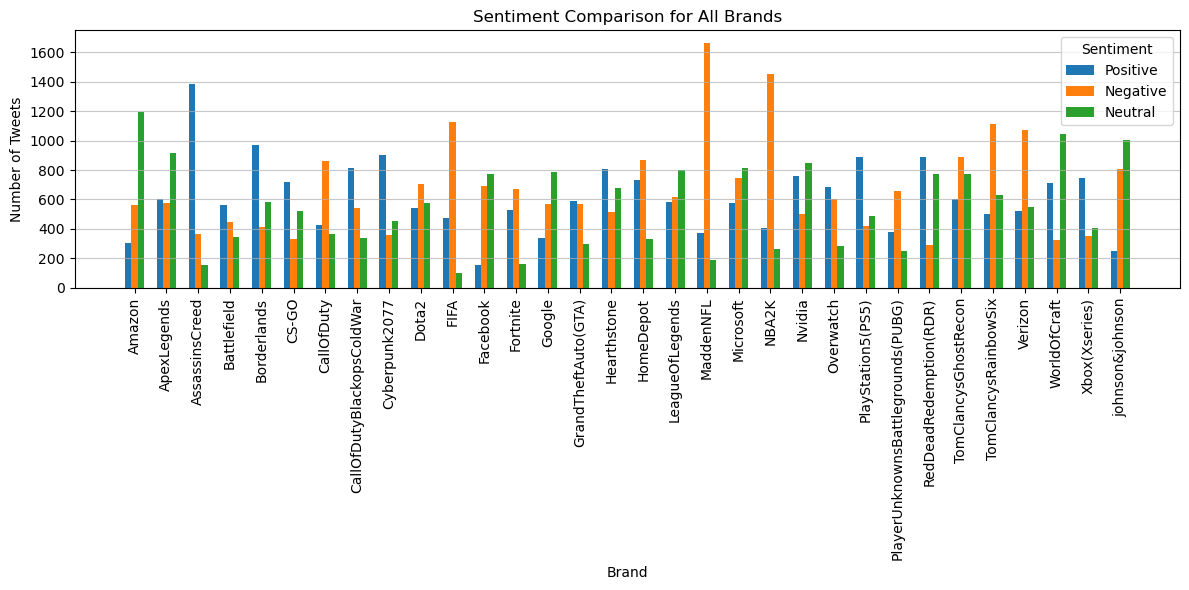

In [50]:
sentiment_categories = ['Positive', 'Negative', 'Neutral']
brand_sentiment_counts = brand_sentiment_counts.reindex(columns=sentiment_categories, fill_value=0)

brands = brand_sentiment_counts.index.tolist()
x = np.arange(len(brands))
bar_width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))

for i, sentiment in enumerate(sentiment_categories):
    ax.bar(x + i * bar_width, brand_sentiment_counts[sentiment], width=bar_width, label=sentiment)

ax.set_xlabel('Brand')
ax.set_ylabel('Number of Tweets')
ax.set_title('Sentiment Comparison for All Brands')
ax.set_xticks(x + bar_width)
ax.set_xticklabels(brands,rotation = 90)
ax.legend(title='Sentiment')
ax.grid(axis='y', linestyle='-', alpha=0.7)

plt.tight_layout()
plt.show()
